# Desafio IGTI modulo 3

In [43]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from google.colab import files 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.datasets import fetch_openml


In [44]:
# Download dataset
t0 = time()
train_samples = 15000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

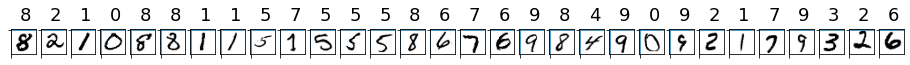

In [45]:
# Exemplo dados de treino
count = 0
sample_size = 30
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

In [46]:
# Padronização dos dados de treino e teste
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de classificação
clf = LogisticRegression(C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)

# Avaliação do modelo
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 80.20%
Test score with L1 penalty: 0.8387


Example run in 1469.945 s


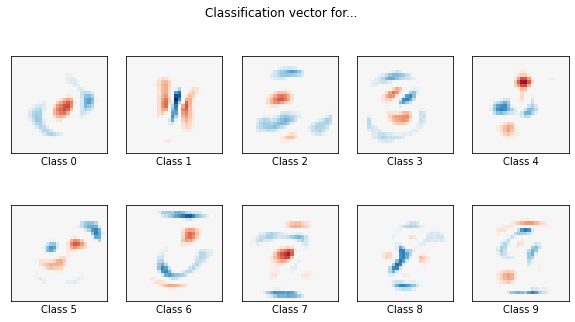

In [52]:
# Plotagem dos vetores
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time() - t0
print('Example run in %.3f s' % run_time)
plt.show()